In [1]:
!pip install torch torchvision diffusers transformers accelerate moviepy --quiet

In [2]:
import torch
import torch.nn as nn
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np
from diffusers import StableDiffusionPipeline
from moviepy.editor import ImageSequenceClip
import os

/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
  if event.key is 'enter':



In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)
pipe = pipe.to(device)

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

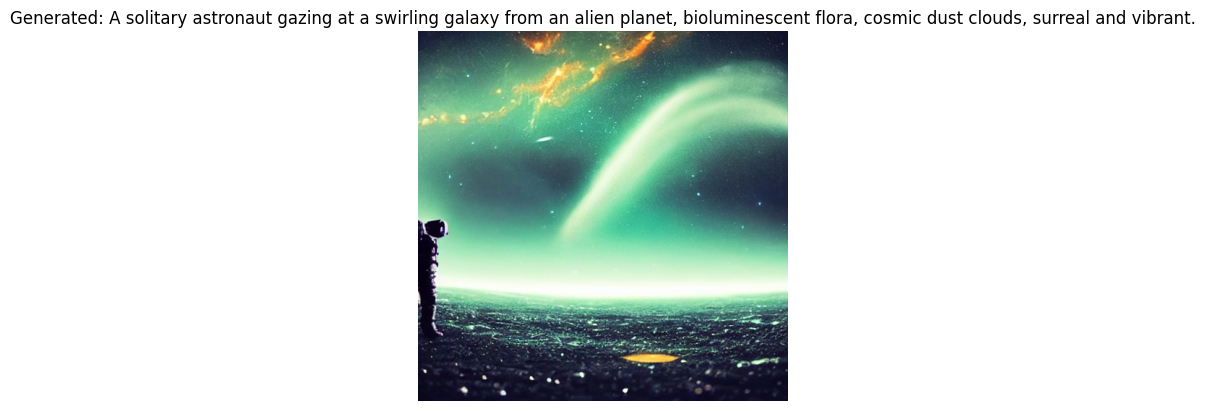

Saved: generated_outputs/space_art_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

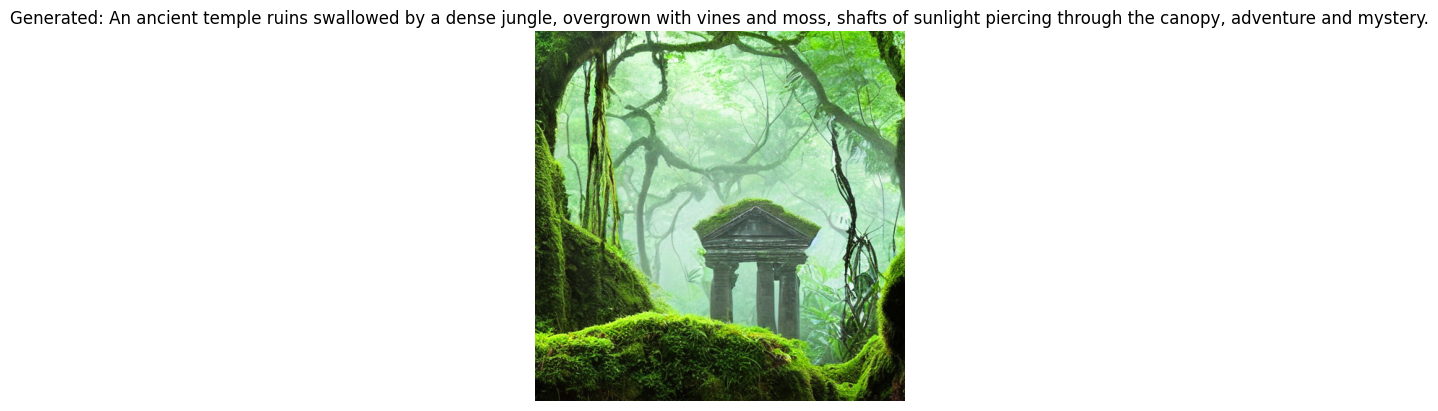

Saved: generated_outputs/jungle_ruins_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

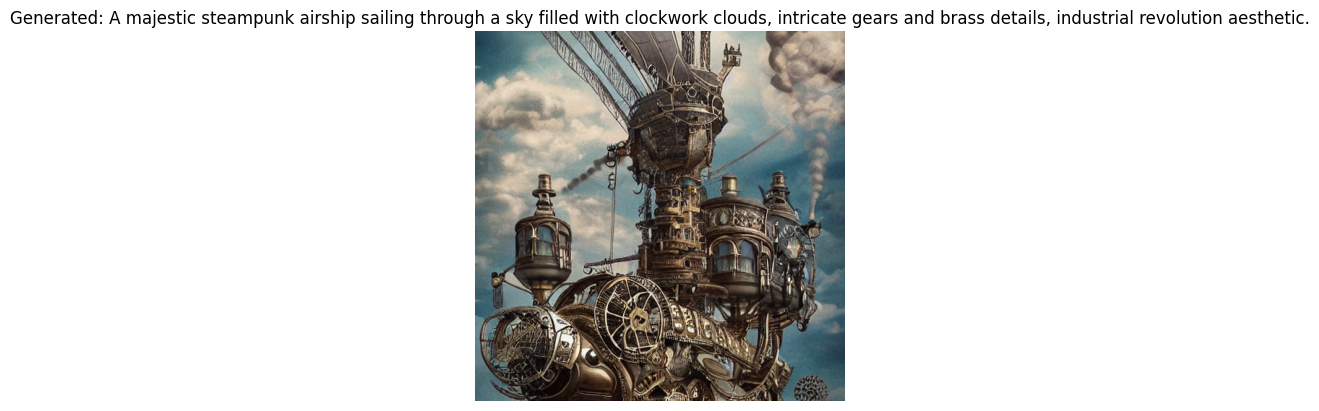

Saved: generated_outputs/steampunk_ship_1.png


In [6]:
# Create output folder
os.makedirs("generated_outputs", exist_ok=True)

def generate_art(prompt, filename):
    image = pipe(prompt, guidance_scale=7.5).images[0]
    path = f"generated_outputs/{filename}.png"
    image.save(path)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Generated: {prompt}")
    plt.show()
    print(f"Saved: {path}")

# Generate multiple artworks
generate_art("A solitary astronaut gazing at a swirling galaxy from an alien planet, bioluminescent flora, cosmic dust clouds, surreal and vibrant.", "space_art_1")
generate_art("An ancient temple ruins swallowed by a dense jungle, overgrown with vines and moss, shafts of sunlight piercing through the canopy, adventure and mystery.", "jungle_ruins_1")
generate_art("A majestic steampunk airship sailing through a sky filled with clockwork clouds, intricate gears and brass details, industrial revolution aesthetic.", "steampunk_ship_1")

In [7]:
# Number of video frames
num_frames = 16

# Stores generated image file paths
image_paths = []

for i in range(num_frames):
    # Vary the viewpoint/scene for animation effect
    prompt = f"Wolves running race through a wet alley, ultra detailed, dynamic motion blur, ground-level angle, reflecting neon lights, high speed"
    filename = f"futuristic_race_{i:02d}.png"
    path = f"generated_outputs/{filename}"

    # Generate and save each frame
    image = pipe(prompt, guidance_scale=7.5).images[0]
    image.save(path)
    image_paths.append(path)
    print(f"Saved: {path}")

  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_outputs/futuristic_race_00.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_outputs/futuristic_race_01.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_outputs/futuristic_race_02.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_outputs/futuristic_race_03.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_outputs/futuristic_race_04.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_outputs/futuristic_race_05.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_outputs/futuristic_race_06.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_outputs/futuristic_race_07.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_outputs/futuristic_race_08.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_outputs/futuristic_race_09.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_outputs/futuristic_race_10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_outputs/futuristic_race_11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_outputs/futuristic_race_12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_outputs/futuristic_race_13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_outputs/futuristic_race_14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_outputs/futuristic_race_15.png


In [8]:
# Set FPS (frames per second)
fps = 6

# Create the video
clip = ImageSequenceClip(image_paths, fps=fps)
video_output_path = "generated_outputs/futuristic_car_race.mp4"
clip.write_videofile(video_output_path, codec="libx264")

print(f"Video saved to: {video_output_path}")

Moviepy - Building video generated_outputs/futuristic_car_race.mp4.
Moviepy - Writing video generated_outputs/futuristic_car_race.mp4



Moviepy - Done !
Moviepy - video ready generated_outputs/futuristic_car_race.mp4
Video saved to: generated_outputs/futuristic_car_race.mp4


In [9]:
from IPython.display import Video, display

display(Video(video_output_path, embed=True))

In [ ]:
!pip install torch torchvision diffusers transformers accelerate moviepy --quiet

import torch
import torch.nn as nn
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np
from diffusers import StableDiffusionPipeline
from moviepy.editor import ImageSequenceClip
import os

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)
pipe = pipe.to(device)

# Create output folder
os.makedirs("generated_outputs", exist_ok=True)

def generate_art(prompt, filename):
    image = pipe(prompt, guidance_scale=7.5).images[0]
    path = f"generated_outputs/{filename}.png"
    image.save(path)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Generated: {prompt}")
    plt.show()
    print(f"Saved: {path}")

# Generate multiple artworks
generate_art("A solitary astronaut gazing at a swirling galaxy from an alien planet, bioluminescent flora, cosmic dust clouds, surreal and vibrant.", "space_art_1")
generate_art("An ancient temple ruins swallowed by a dense jungle, overgrown with vines and moss, shafts of sunlight piercing through the canopy, adventure and mystery.", "jungle_ruins_1")
generate_art("A majestic steampunk airship sailing through a sky filled with clockwork clouds, intricate gears and brass details, industrial revolution aesthetic.", "steampunk_ship_1")

# Number of video frames
num_frames = 16

# Stores generated image file paths
image_paths = []

for i in range(num_frames):
    # Vary the viewpoint/scene for animation effect
    prompt = f"Wolves running race through a wet alley, ultra detailed, dynamic motion blur, ground-level angle, reflecting neon lights, high speed"
    filename = f"wolves_running_{i:02d}.png"
    path = f"generated_outputs/{filename}"

    # Generate and save each frame
    image = pipe(prompt, guidance_scale=7.5).images[0]
    image.save(path)
    image_paths.append(path)
    print(f"Saved: {path}")

# Set FPS (frames per second)
fps = 6

# Create the video
clip = ImageSequenceClip(image_paths, fps=fps)
video_output_path = "generated_outputs/wolves_running.mp4"
clip.write_videofile(video_output_path, codec="libx264")

print(f"Video saved to: {video_output_path}")

from IPython.display import Video, display

display(Video(video_output_path, embed=True))